<a href="https://colab.research.google.com/github/msskx/deepLearning/blob/main/%E7%97%85%E7%90%86%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/torch学习笔记/医学病理图像.zip

In [3]:
import torch
from torch.utils import data
from PIL import Image
import numpy as np
import torchvision
from torchvision import transforms

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import torch.nn as nn

In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import glob
import json

In [8]:
# 图像路径
train_path = glob.glob(r'./train/*.jpg')

In [9]:
with open('train.json') as f:
    train_labels=json.load(f)
with open('test.json') as f:
    test_labels=json.load(f)

In [10]:
train_imgs_path=[]
train_imgs_label=[]

test_imgs_path=[]
test_imgs_label=[]

In [11]:
for i in train_labels:
    train_imgs_path.append(i['name'])
    train_imgs_label.append(i['label'])
    
for i in test_labels:
    test_imgs_path.append('test/'+i['name'])
    test_imgs_label.append(i['label'])

In [12]:
len(train_imgs_path),len(train_imgs_label),len(test_imgs_path),len(test_imgs_label)

(4021, 4021, 2139, 2139)

In [13]:
# # 标签路径
# all_train_imgs=[img_p.split('\\')[1] for img_p in train_path]

In [14]:
# all_train_imgs[:3]

In [38]:
trans=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

In [39]:
class Dataset(data.Dataset):
    def __init__(self,imgs_path,labels):
        self.imgs = imgs_path
        self.labels = labels
    def __getitem__(self,index):
        img = self.imgs[index]
        label =self.labels[index]
        
        pil_img=Image.open(img)
        np_img=np.asarray(pil_img,dtype=np.uint8)
        if len(np_img.shape)==2:
            img_data=np.repeat(np_img[:,:,np.newaxis],3,axis=2)
            pil_img=Image.fromarray(img_data)
        img_tensor=trans(pil_img)
        return img_tensor,label
    def __len__(self):
        return len(self.imgs)

In [40]:
train_ds=Dataset(train_imgs_path,train_imgs_label)

test_ds=Dataset(test_imgs_path,test_imgs_label)

In [41]:
train_dl=data.DataLoader(
    train_ds,
    batch_size=16
)

test_dl=data.DataLoader(
    test_ds,
    batch_size=16
)

In [42]:
img_batch,label_batch=next(iter(train_dl))

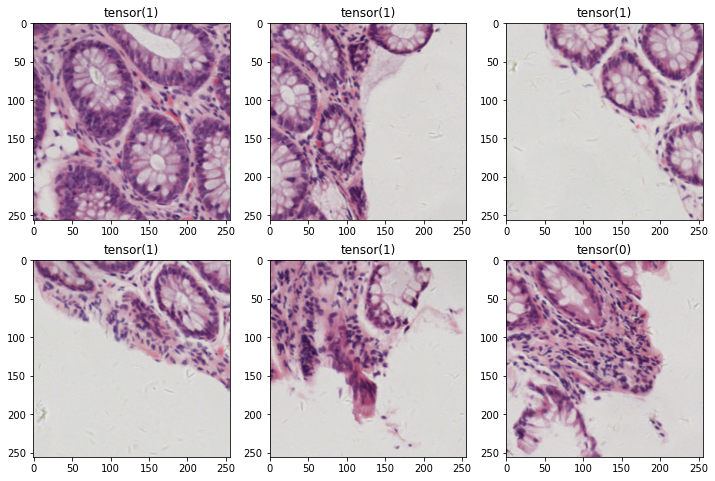

In [43]:
plt.figure(figsize=(12,8))
for i,(img,label) in enumerate(zip(img_batch[:6],label_batch[:6])):
    img = img.permute(1,2,0).numpy()
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(label)

In [52]:
my_model = torchvision.models.vgg19(pretrained=False)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [53]:

optim = torch.optim.Adam(my_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [54]:
print(my_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [57]:

my_model.classifier[6].out_features=4

In [58]:
print(my_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [59]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl, epochs=20, device='cuda'):
   
    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    history = {} # Collects per-epoch loss and acc like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    history['acc'] = []
    history['val_acc'] = []

    start_time_sec = time.time()
    model.to(device)
    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        model.train()
        train_loss         = 0.0
        num_train_correct  = 0
        num_train_examples = 0

        for batch in train_dl:

            optimizer.zero_grad()

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            loss.backward()
            optimizer.step()

            train_loss         += loss.data.item() * x.size(0)
            num_train_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_train_examples += x.shape[0]

        train_acc   = num_train_correct / num_train_examples
        train_loss  = train_loss / len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        val_loss       = 0.0
        num_val_correct  = 0
        num_val_examples = 0

        for batch in val_dl:

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            val_loss         += loss.data.item() * x.size(0)
            num_val_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_val_examples += y.shape[0]

        val_acc  = num_val_correct / num_val_examples
        val_loss = val_loss / len(val_dl.dataset)


        print('Epoch %3d/%3d, train loss: %5.2f, train acc: %5.2f, val loss: %5.2f, val acc: %5.2f' % \
              (epoch+1, epochs, train_loss, train_acc, val_loss, val_acc))

        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # END OF TRAINING LOOP
    end_time_sec       = time.time()
    total_time_sec     = end_time_sec - start_time_sec
    time_per_epoch_sec = total_time_sec / epochs
    print()
    print('Time total:     %5.2f sec' % (total_time_sec))
    print('Time per epoch: %5.2f sec' % (time_per_epoch_sec))

    plt.figure(dpi=150)
    plt.plot(range(1,epochs+1),history['loss'],label='train_loss')
    plt.plot(range(1,epochs+1),history['val_loss'],label='test_loss')
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(dpi=150)
    plt.plot(range(1,epochs+1),history['acc'],label='train_acc')
    plt.plot(range(1,epochs+1),history['val_acc'],label='test_acc')
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    return history

In [60]:
history=train(my_model, optim, loss_fn, train_dl, test_dl, epochs=20, device='cuda')

train() called: model=VGG, opt=Adam(lr=0.001000), epochs=20, device=cuda

Epoch   1/ 20, train loss:  9.97, train acc:  0.57, val loss:  1.91, val acc:  0.39
Epoch   2/ 20, train loss:  1.31, train acc:  0.49, val loss:  1.70, val acc:  0.39
Epoch   3/ 20, train loss:  1.36, train acc:  0.44, val loss:  1.58, val acc:  0.39
Epoch   4/ 20, train loss:  1.33, train acc:  0.44, val loss:  1.93, val acc:  0.39
Epoch   5/ 20, train loss:  1.34, train acc:  0.48, val loss:  1.95, val acc:  0.39
Epoch   6/ 20, train loss:  1.38, train acc:  0.44, val loss:  1.54, val acc:  0.39
Epoch   7/ 20, train loss:  1.37, train acc:  0.41, val loss:  1.48, val acc:  0.39
Epoch   8/ 20, train loss:  1.38, train acc:  0.41, val loss:  1.43, val acc:  0.39
Epoch   9/ 20, train loss:  1.40, train acc:  0.37, val loss:  1.38, val acc:  0.39
Epoch  10/ 20, train loss:  1.39, train acc:  0.35, val loss:  1.36, val acc:  0.39
Epoch  11/ 20, train loss:  1.39, train acc:  0.34, val loss:  1.35, val acc:  0.39
Ep

KeyboardInterrupt: ignored